### PART 1 — DATA EXPLORATION & PREPARATION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter
from sklearn.model_selection import train_test_split

pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("twitter_disaster (1) - twitter_disaster (1).csv")

In [4]:
import pandas as pd

DATA_PATH = "/mnt/data/twitter_disaster (1) - twitter_disaster (1).csv"

df = pd.read_csv("twitter_disaster (1) - twitter_disaster (1).csv")

print("Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()

Dataset Loaded Successfully!
Shape: (7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [5]:
print("Column Names & Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

Column Names & Types:
id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

Missing Values:
id             0
keyword       61
location    2534
text           0
target         0
dtype: int64


In [6]:
text_col = "text"
label_col = "target"

print("Text Column:", text_col)
print("Label Column:", label_col)

display(df[[text_col, label_col]].head())

Text Column: text
Label Column: target


,text,target
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,"13,000 people receive #wildfires evacuation orders in California",1
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


Class Distribution:
Non-Disaster (0)    4342
Disaster (1)        3271
Name: count, dtype: int64


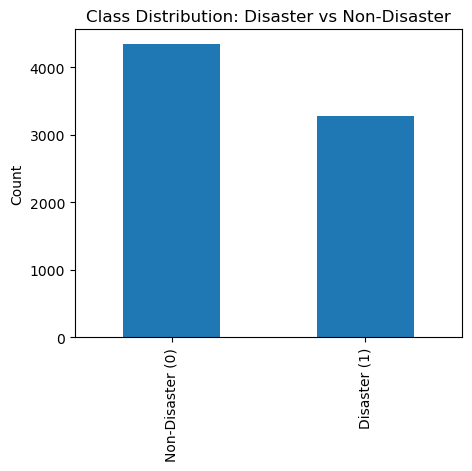

In [7]:
class_counts = df[label_col].value_counts().sort_index()
class_counts.index = ["Non-Disaster (0)", "Disaster (1)"]

print("Class Distribution:")
print(class_counts)

plt.figure(figsize=(5,4))
class_counts.plot(kind="bar")
plt.title("Class Distribution: Disaster vs Non-Disaster")
plt.ylabel("Count")
plt.show()

In [8]:
def clean_text_basic(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", " ", text)
    text = re.sub(r"@\w+", " ", text)
    text = re.sub(r"#", " ", text)
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [9]:
disaster_df = df[df[label_col] == 1]

tokens = []
for t in disaster_df[text_col].dropna():
    cleaned = clean_text_basic(t)
    tokens.extend(cleaned.split())

stopwords = {"the","a","an","in","on","and","is","are","was","were","to",
             "of","for","with","that","this","it","as","at","from","by","be"}

tokens_filtered = [w for w in tokens if w not in stopwords and len(w)>2]

freq = Counter(tokens_filtered)
top20 = freq.most_common(20)

print("Top 20 Disaster-Related Words:")
top20

Top 20 Disaster-Related Words:


[('fire', 182),
 ('after', 181),
 ('you', 146),
 ('have', 144),
 ('news', 139),
 ('amp', 135),
 ('over', 129),
 ('more', 124),
 ('disaster', 121),
 ('via', 121),
 ('california', 115),
 ('suicide', 112),
 ('police', 109),
 ('when', 108),
 ('people', 105),
 ('has', 104),
 ('who', 103),
 ('but', 97),
 ('killed', 95),
 ('not', 94)]

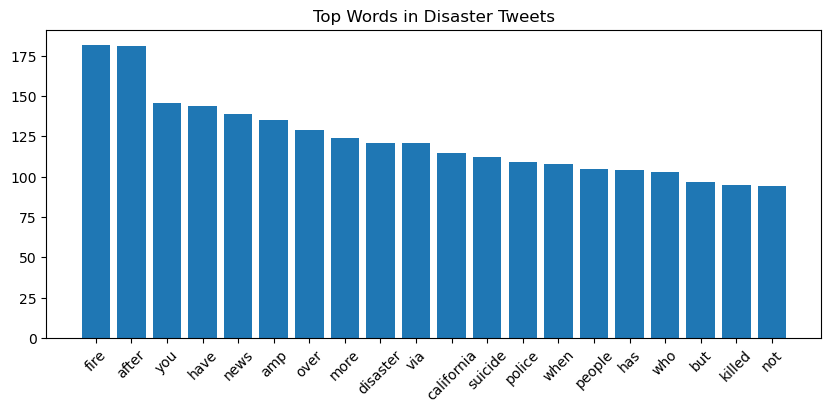

In [10]:
words = [w for w,c in top20]
counts = [c for w,c in top20]

plt.figure(figsize=(10,4))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top Words in Disaster Tweets")
plt.show()

In [11]:
df["clean_text"] = df[text_col].apply(clean_text_basic)
df["tokens"] = df["clean_text"].apply(lambda x: x.split())

display(df.head())

,id,keyword,location,text,target,clean_text,tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,our deeds are the reason of this earthquake may allah forgive us all,"[our, deeds, are, the, reason, of, this, earthquake, may, allah, forgive, us, all]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected,"[all, residents, asked, to, shelter, in, place, are, being, notified, by, officers, no, other, evacuation, or, shelter, in, place, orders, are, expected]"
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,13 000 people receive wildfires evacuation orders in california,"[13, 000, people, receive, wildfires, evacuation, orders, in, california]"
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,just got sent this photo from ruby alaska as smoke from wildfires pours into a school,"[just, got, sent, this, photo, from, ruby, alaska, as, smoke, from, wildfires, pours, into, a, school]"


In [12]:
X = df["clean_text"]
y = df[label_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

train_df = pd.DataFrame({"clean_text": X_train, "label": y_train})
test_df  = pd.DataFrame({"clean_text": X_test,  "label": y_test})

print("Train size:", len(train_df))
print("Test size:", len(test_df))

Train size: 6090
Test size: 1523


In [13]:
train_path = "/mnt/data/train_processed.csv"
test_path  = "/mnt/data/test_processed.csv"

train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)

print("Files Saved:")
print(train_path)
print(test_path)

Files Saved:
/mnt/data/train_processed.csv
/mnt/data/test_processed.csv


### Part 2: Feature Engineering and Model Selection

In [15]:
import pandas as pd

train_df = pd.read_csv("/mnt/data/train_processed.csv")
test_df  = pd.read_csv("/mnt/data/test_processed.csv")

print(train_df.shape, test_df.shape)
train_df.head()

(6090, 2) (1523, 2)


,clean_text,label
0,sassy city girl country hunk stranded in smoky mountain snowstorm aoms ibooklove bookboost,1
1,god s kingdom heavenly gov t will rule over all people on the earth after armageddon,0
2,mopheme and bigstar johnson are a problem in this game body bagging niggas vuzuhustle,0
3,sounds like a whirlwind life,0
4,malaysia confirms plane debris washed up on reunion island is from flight mh370,1


In [16]:
import re

def extract_features(text):
    features = {}
    features["length"] = len(text)
    features["num_words"] = len(text.split())
    features["hashtags"] = len(re.findall(r"#\w+", text))
    features["mentions"] = len(re.findall(r"@\w+", text))
    return features

extra_train = train_df["clean_text"].apply(extract_features).apply(pd.Series)
extra_test  = test_df["clean_text"].apply(extract_features).apply(pd.Series)

extra_train.head()

,length,num_words,hashtags,mentions
0,90,13,0,0
1,84,16,0,0
2,85,14,0,0
3,28,5,0,0
4,79,13,0,0


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    stop_words="english"
)

X_train_tfidf = tfidf.fit_transform(train_df["clean_text"])
X_test_tfidf  = tfidf.transform(test_df["clean_text"])

X_train_tfidf.shape

(6090, 5000)

In [18]:
from scipy.sparse import hstack

# Convert extra numeric features to sparse matrix
from scipy import sparse

extra_train_sparse = sparse.csr_matrix(extra_train.values)
extra_test_sparse  = sparse.csr_matrix(extra_test.values)

# Final combined features
X_train_final = hstack([X_train_tfidf, extra_train_sparse])
X_test_final  = hstack([X_test_tfidf,  extra_test_sparse])

y_train = train_df["label"].values
y_test  = test_df["label"].values

X_train_final.shape, X_test_final.shape

((6090, 5004), (1523, 5004))

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(max_iter=500)

scores = cross_val_score(logreg, X_train_final, y_train, cv=5, scoring="f1")
print("Logistic Regression F1 (CV):", scores.mean())

logreg.fit(X_train_final, y_train)

Logistic Regression F1 (CV): 0.723840461554456


LogisticRegression(max_iter=500)

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)

scores = cross_val_score(rf, X_train_final, y_train, cv=5, scoring="f1")
print("Random Forest F1 (CV):", scores.mean())

rf.fit(X_train_final, y_train)

Random Forest F1 (CV): 0.7007122886746144


RandomForestClassifier(n_estimators=200, random_state=42)

In [21]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import warnings

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=Warning)

# FIX 1 — set dual='auto' (removes FutureWarning)
# FIX 2 — increase max_iter to 5000 (removes ConvergenceWarning)

svm = LinearSVC(dual="auto", max_iter=5000)

scores = cross_val_score(svm, X_train_final, y_train, cv=5, scoring="f1")
print("SVM F1 Score (Cross-Validation):", round(scores.mean(), 4))

svm.fit(X_train_final, y_train)

SVM F1 Score (Cross-Validation): 0.7112


LinearSVC(dual='auto', max_iter=5000)

In [22]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(128,64), max_iter=10)

scores = cross_val_score(mlp, X_train_final, y_train, cv=5, scoring="f1")
print("MLP Neural Network F1 (CV):", scores.mean())

mlp.fit(X_train_final, y_train)

MLP Neural Network F1 (CV): 0.7212612712475506


MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=10)

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.1, 1, 5],
    "penalty": ["l2"]
}

grid = GridSearchCV(
    LogisticRegression(max_iter=500),
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid.fit(X_train_final, y_train)

print("Best Hyperparameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

Best Hyperparameters: {'C': 5, 'penalty': 'l2'}
Best F1 Score: 0.7324330157486345


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

best_model = svm  # change if another model performed better

y_pred = best_model.predict(X_test_final)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       869
           1       0.77      0.73      0.75       654

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.79      1523
weighted avg       0.79      0.79      0.79      1523

[[729 140]
 [176 478]]


### Part 3: Model Evaluation & Validation.

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

In [27]:
results = {}

results["Logistic Regression"] = evaluate_model(logreg, X_test_final, y_test)
results["Random Forest"]      = evaluate_model(rf, X_test_final, y_test)
results["SVM"]                = evaluate_model(svm, X_test_final, y_test)
results["Neural Network"]     = evaluate_model(mlp, X_test_final, y_test)

results

{'Logistic Regression': {'Accuracy': 0.8056467498358503,
  'Precision': 0.8044217687074829,
  'Recall': 0.7232415902140673,
  'F1 Score': 0.7616747181964574},
 'Random Forest': {'Accuracy': 0.804333552199606,
  'Precision': 0.8396946564885496,
  'Recall': 0.672782874617737,
  'F1 Score': 0.7470288624787776},
 'SVM': {'Accuracy': 0.7925147734734077,
  'Precision': 0.7734627831715211,
  'Recall': 0.7308868501529052,
  'F1 Score': 0.7515723270440252},
 'Neural Network': {'Accuracy': 0.7879185817465528,
  'Precision': 0.7416058394160584,
  'Recall': 0.7767584097859327,
  'F1 Score': 0.7587752053771472}}

In [28]:
pd.DataFrame(results).T

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.805647,0.804422,0.723242,0.761675
Random Forest,0.804334,0.839695,0.672783,0.747029
SVM,0.792515,0.773463,0.730887,0.751572
Neural Network,0.787919,0.741606,0.776758,0.758775


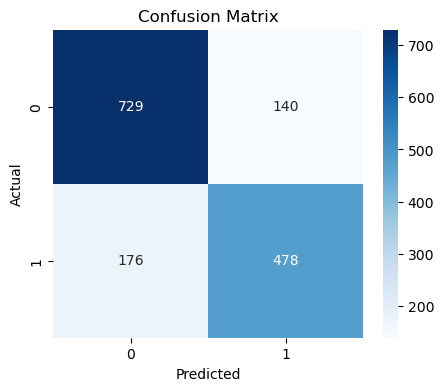

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

best_model = svm   # change if another model performed better

y_pred = best_model.predict(X_test_final)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

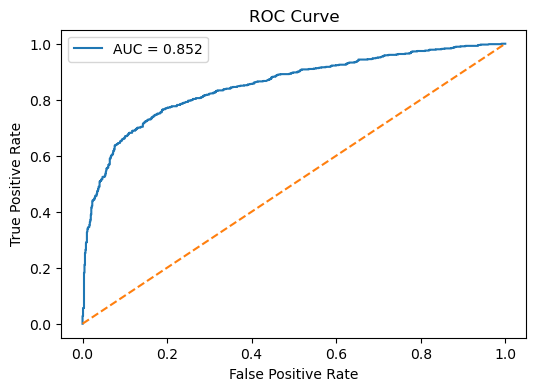

In [30]:
from sklearn.metrics import roc_curve, auc

# get decision scores (SVM has decision_function instead of predict_proba)
if hasattr(best_model, "predict_proba"):
    y_scores = best_model.predict_proba(X_test_final)[:,1]
else:
    y_scores = best_model.decision_function(X_test_final)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="AUC = {:.3f}".format(roc_auc))
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

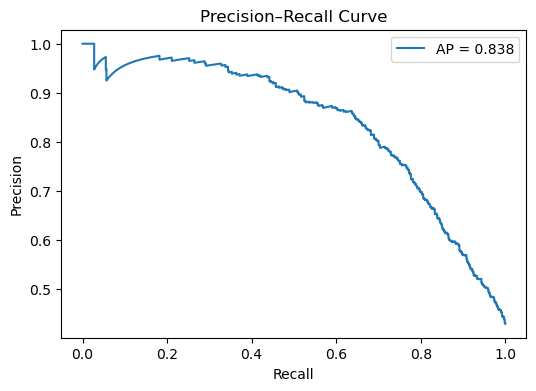

In [31]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
ap = average_precision_score(y_test, y_scores)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label="AP = {:.3f}".format(ap))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.show()

In [32]:
y_train_pred = best_model.predict(X_train_final)
y_test_pred  = best_model.predict(X_test_final)

train_f1 = f1_score(y_train, y_train_pred)
test_f1  = f1_score(y_test, y_test_pred)

print("Train F1:", train_f1)
print("Test  F1:", test_f1)

Train F1: 0.9134328358208955
Test  F1: 0.7515723270440252


In [33]:
print("Best Model Based on Comparison:")
pd.DataFrame(results).T.sort_values("F1 Score", ascending=False).head(1)

Best Model Based on Comparison:


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.805647,0.804422,0.723242,0.761675


### Part 4: Part 4: Deployment with Web Interface 

In [35]:
import pickle

# Change svm → your best model if needed
best_model = svm  

# save model
with open("model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# save TF-IDF vectorizer
with open("tfidf.pkl", "wb") as f:
    pickle.dump(tfidf, f)

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


In [36]:
import os
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\Jaspreet


In [37]:
import streamlit as st
import pickle
import re
import string

# Load model and TF-IDF
model = pickle.load(open("model.pkl", "rb"))
tfidf = pickle.load(open("tfidf.pkl", "rb"))

# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"@\w+|#\w+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Streamlit UI
st.set_page_config(page_title="Disaster Tweet Classifier", page_icon="🚨")

st.title(" Disaster Tweet Classifier")
st.write("Enter a tweet below to check whether it indicates a disaster or not.")

tweet = st.text_area("Type or paste a tweet here...")

if st.button("Classify"):
    if tweet.strip() == "":
        st.warning("Please enter a tweet.")
    else:
        cleaned = clean_text(tweet)
        vector = tfidf.transform([cleaned])
        prediction = model.predict(vector)[0]

        if prediction == 1:
            st.error(" This is a **Disaster Tweet**.")
        else:
            st.success(" This is a **Non-Disaster Tweet**.")

2025-12-10 10:54:46.812 
  command:

    streamlit run C:\Users\Jaspreet\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [38]:
cd "C:\Users\Jaspreet\OneDrive\Desktop\tweetApp"

C:\Users\Jaspreet\OneDrive\Desktop\tweetApp
